In [1]:
import os
import shutil
from collections import Counter
from matplotlib import pyplot as plt


In [2]:
def find_between(s, first, last):
    try:
        start = s.index( first ) + len( first )
        end = s.index( last, start )
        return s[start:end]
    except ValueError:
        return ""

In [3]:
def func(name):
    f = open(name)
    file = f.read()
    texts = []
    while (True):
        file = file[file.find("anonymized") + 1: ]
        s = find_between(file, "nonymized", "visibility")
        if (s in texts):
            break
        texts.append(s)
    for i in range(len(texts)):
        texts[i] = texts[i][4: texts[i].find('\n') - 3]
        
    file = open("../Dataset/Soccernet/Soccernet.txt", 'a')
    
    for i in texts:
        file.write(i + '\n\n')
        # print(i)
        
    file.close()    

In [4]:
# %ls

dr = "./Dataset/SoccerNet/caption-2023"
# !ls "./Dataset/Soccernet/caption-2023"

paths = []
for filename in os.scandir(dr):
    if (filename.is_dir()):
        paths.append(filename.path)

years = []
for folder in paths:
    for filename in os.scandir(folder):
        if (filename.is_dir()):
            years.append(filename.path)
            
games = []

for folder in years:
    for filename in os.scandir(folder):
        if (filename.is_dir()):
            games.append(filename.path)
len(games)

471

In [5]:
for game_num in range(len(games)):
    #Labels-caption.json
    source_dir = "E:/Cognitive Reasoning Engine/Codes/" + games[game_num][2:] + "/Labels-caption.json"
    dest_dir = f"./soccers/{game_num}.json"
    # print(source_dir)
    # print("E:\Cognitive Reasoning Engine\Codes\Dataset\SoccerNet\caption-2023\england_epl\2014-2015\2015-02-21 - 18-00 Chelsea 1 - 1 Burnley\Labels-caption.json")
    try:
        shutil.copy(source_dir, dest_dir)
    except:
        print(f"could not find {source_dir} probably")

In [6]:
# assign directory
directory = './soccers/'
 
# iterate over files in
# that directory
for filename in os.scandir(directory):
    if filename.is_file():
        print(filename.path)
        func(filename.path)

./soccers/0.json
./soccers/1.json
./soccers/10.json
./soccers/100.json
./soccers/101.json
./soccers/102.json
./soccers/103.json
./soccers/104.json
./soccers/105.json
./soccers/106.json
./soccers/107.json
./soccers/108.json
./soccers/109.json
./soccers/11.json
./soccers/110.json
./soccers/111.json
./soccers/112.json
./soccers/113.json
./soccers/114.json
./soccers/115.json
./soccers/116.json
./soccers/117.json
./soccers/118.json
./soccers/119.json
./soccers/12.json
./soccers/120.json
./soccers/121.json
./soccers/122.json
./soccers/123.json
./soccers/124.json
./soccers/125.json
./soccers/126.json
./soccers/127.json
./soccers/128.json
./soccers/129.json
./soccers/13.json
./soccers/130.json
./soccers/131.json
./soccers/132.json
./soccers/133.json
./soccers/134.json
./soccers/135.json
./soccers/136.json
./soccers/137.json
./soccers/138.json
./soccers/139.json
./soccers/14.json
./soccers/140.json
./soccers/141.json
./soccers/142.json
./soccers/143.json
./soccers/144.json
./soccers/145.json
./

In [7]:
def most_frequent(List):
    occurence_count = Counter(List)
    return occurence_count.most_common(1)[0][0]

In [8]:
# count the nuumber of paragraphs in the dataset
f = open("E:\Cognitive Reasoning Engine\Dataset\Soccernet\Soccernet.txt", "r", encoding='utf-8')
files = f.read()
files = files.replace(".", "")
files = files.replace(",", "")
files = files.replace(";", "")
files = files.replace(":", "")
files = files.replace("!", "")

dataset = files.split("\n\n")
print(f"the number of paragraphs in the dataset before removing redundants:\t\t{len(dataset)}")
uniqued_dataset = list(set(dataset))
# dataset = sorted(dataset)
print(f"the number of paragraphs in the dataset after removing redundants:\t\t{len(uniqued_dataset)}")
# for i in dataset:
    # print(i)
print("The most repeated paragraph:")
print(most_frequent(dataset))
print("The most repeated paragraph repeated\t", dataset.count(most_frequent(dataset)), "\ttimes.")


words_splitted = []
recurred_words = []
for par in dataset:
    l = par.split(" ")
    for word in l:
        the_word = word.lower()
        recurred_words.append(the_word)
        if the_word not in words_splitted:
            words_splitted.append(the_word)
    
print(f"the number of distinct words in the dataset:\t\t{len(words_splitted)}")
print(f"the number of words in the dataset:\t\t\t{len(recurred_words)}")

dictionary = {}
for word in recurred_words:
    dictionary[word] = 0
for word in recurred_words:
    dictionary[word] += 1

print("\nList of the most occurred words in the dataset:\n\n")
dictionary = dict(sorted(dictionary.items(), key=lambda item: item[1], reverse=True))
for word, count in dictionary.items():
    print(f"{word.ljust(40)} {str(count).rjust(10)}")

the number of paragraphs in the dataset before removing redundants:		588218
the number of paragraphs in the dataset after removing redundants:		9727
The most repeated paragraph:
[COACH] has decided to make a change [PLAYER] ([TEAM]) replaces [PLAYER]
The most repeated paragraph repeated	 2353 	times.
the number of distinct words in the dataset:		2690
the number of words in the dataset:			12568665

List of the most occurred words in the dataset:


the                                         1182104
[player]                                     627957
a                                            608524
([team])                                     507085
to                                           373492
of                                           291629
and                                          290748
is                                           226056
but                                          209642
his                                          201952
ball                         

In [9]:
def sort_by_frequency(lst):  
    freq_dict = {}  
    for element in lst:  
        if element in freq_dict:  
            freq_dict[element] += 1  
        else:  
            freq_dict[element] = 1  
    sorted_dict = dict(  
        sorted(freq_dict.items(), key=lambda item: item[1], reverse=True))  
    sorted_list = []  
    for key in sorted_dict:  
        for i in range(sorted_dict[key]):  
            sorted_list.append(key)  
    return sorted_list  

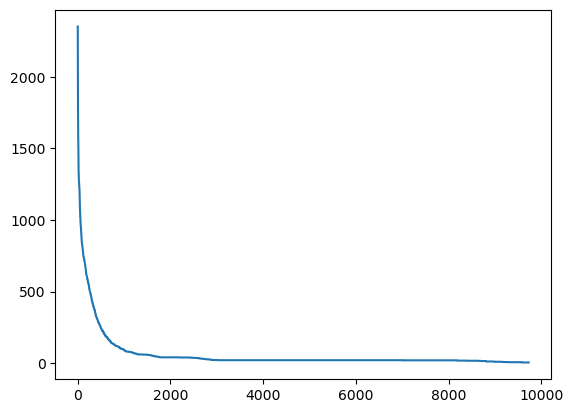

In [10]:
freq_sorted_dataset = sort_by_frequency(dataset)
freqs = {}

for i in freq_sorted_dataset:
    freqs[i] = 0

for i in freq_sorted_dataset:
    freqs[i] += 1
# print(freqs)
xs = [i for i in range(len(freqs))]
ys = [i for i in freqs.values()]
plt.plot(xs, ys)
plt.show()
# for i in freqs.values():
    # print(i)